In [121]:
from sklearn.datasets import make_classification
import numpy as np
# Generate a synthetic dataset for classification
X, y = make_classification(
    n_samples=100,            # Number of data points (samples) to generate
    n_features=2,             # Total number of features (columns) in the dataset
    n_informative=1,          # Number of informative features contributing to class separation
    n_redundant=0,            # Number of redundant features (linear combinations of informative features)
    n_classes=2,              # Number of output classes (binary classification in this case)
    n_clusters_per_class=1,   # Number of clusters generated per class
    random_state=41,          # Random seed for reproducibility
    hypercube=False,          # Whether features should be uniformly distributed in a hypercube (False = Gaussian distribution)
    class_sep= 20            # Controls the separation between classes; higher value means well-separated classes
)

In [122]:
import matplotlib.pyplot as plt

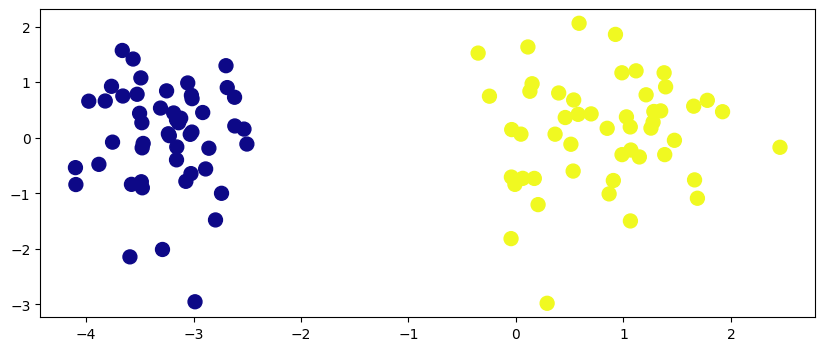

In [123]:
plt.figure(figsize=(10,4))
plt.scatter(X[:,0],X[:,1],c=y,cmap='plasma',s=100)

### Using sklearn class

In [139]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(penalty=None, solver='sag')
lg.fit(X, y)

d:\Data Science\Projects\HousePricePrediction\myenv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [140]:
m = -(lg.coef_[0][0]/lg.coef_[0][1])
c = -(lg.intercept_/lg.coef_[0][1])

In [141]:
x_input = np.linspace(-3, 3, 100)
y_input = m * x_input + c

(-3.0, 2.0)

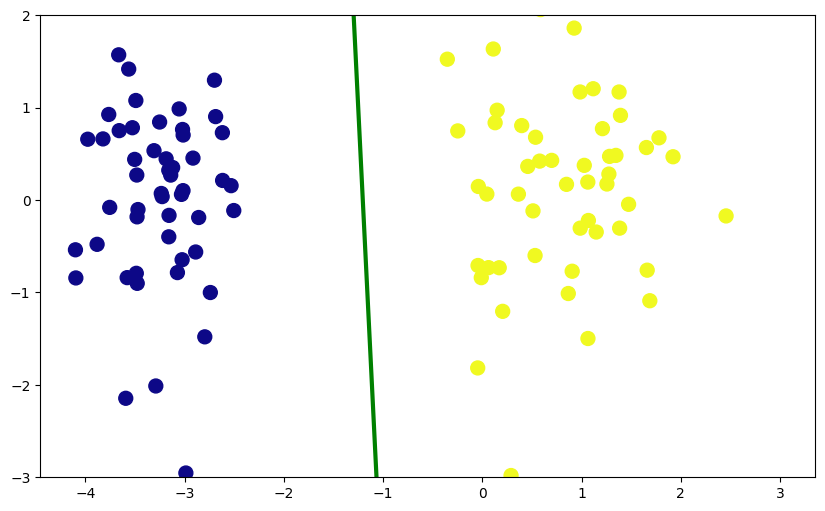

In [142]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='green',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='plasma',s=100)
plt.ylim(-3,2)

### coding from scratch using gradient descent

In [164]:
def gradient(X, y):
    X  = np.insert(X, 0, 1, axis= 1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    epoch = 5000

    for i in range(epoch):
        y_hat = sigmoid(np.dot(X, weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])

    return weights[0],weights[1:]

In [165]:
import numpy as np
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [166]:
intercept_, coef_ = gradient(X,y)
coef_

array([4.83926872, 0.21182255])

In [167]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [168]:
lg.coef_
lg.intercept_

array([5.82406536])

In [169]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

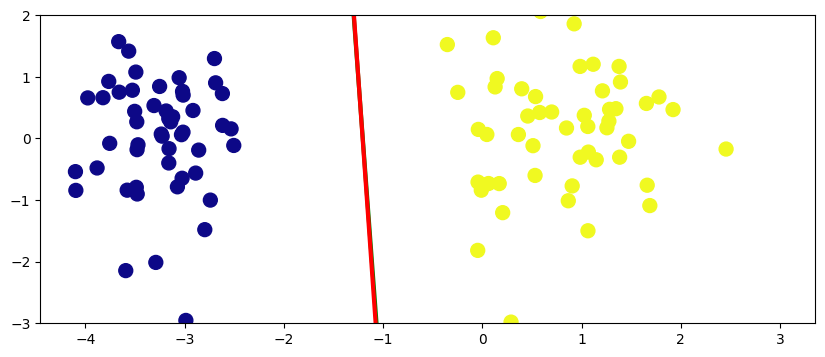

In [170]:
plt.figure(figsize=(10,4))
plt.plot(x_input,y_input,color='green',linewidth=3)
plt.plot(x_input1,y_input1,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='plasma',s=100)
plt.ylim(-3,2)